In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose,STL

In [2]:
df_air_passengers = pd.read_csv('AirPassenger.csv',parse_dates=['Year-Month'],index_col = 'Year-Month')
df_air_passengers

/tmp/ipykernel_4268/1342158083.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_air_passengers = pd.read_csv('AirPassenger.csv',parse_dates=['Year-Month'],index_col = 'Year-Month')


,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [3]:
df_air_passengers.dtypes

Pax    int64
dtype: object

In [4]:
df_air_passengers['1951-01-01':'1952-09-01']

,Pax
Year-Month,
1951-01-01,145
1951-02-01,150
1951-03-01,178
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184


In [5]:
df_air_passengers.tail()

,Pax
Year-Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [6]:
df_air_passengers.loc['1960-11-01']

Pax    390
Name: 1960-11-01 00:00:00, dtype: int64

In [7]:
df_gas = pd.read_csv('Gas.csv')
df_gas.head()

,Unnamed: 0,x
0,1,1709
1,2,1646
2,3,1794
3,4,1878
4,5,2173


In [8]:
df_gas.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
date_df = pd.date_range(start='1-1-1956',end='1-1-1996',freq='M')
date_df

DatetimeIndex(['1956-01-31', '1956-02-29', '1956-03-31', '1956-04-30',
               '1956-05-31', '1956-06-30', '1956-07-31', '1956-08-31',
               '1956-09-30', '1956-10-31',
               ...
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31'],
              dtype='datetime64[ns]', length=480, freq='M')

In [10]:
df_gas['Time_Stamp'] = pd.DataFrame(date_df)

In [11]:
df_gas.set_index('Time_Stamp',inplace=True)

In [12]:
df_gas.head()

,x
Time_Stamp,
1956-01-31,1709
1956-02-29,1646
1956-03-31,1794
1956-04-30,1878
1956-05-31,2173


In [13]:
df_retail = pd.read_csv('RetailTurnover.csv')
df_retail.head()

,Year,Quarter,Turnover
0,1982,Q3,13423.2
1,1982,Q4,13128.8
2,1983,Q1,15398.8
3,1983,Q2,12964.2
4,1983,Q3,13133.5


In [14]:
df_retail.tail()

,Year,Quarter,Turnover
34,1991,Q1,17115.2
35,1991,Q2,14284.9
36,1991,Q3,14558.8
37,1991,Q4,14914.3
38,1992,Q1,17342.3


In [15]:
quarters = pd.date_range(start='9/30/1982',end='3/31/1992',freq='Q')
quarters

DatetimeIndex(['1982-09-30', '1982-12-31', '1983-03-31', '1983-06-30',
               '1983-09-30', '1983-12-31', '1984-03-31', '1984-06-30',
               '1984-09-30', '1984-12-31', '1985-03-31', '1985-06-30',
               '1985-09-30', '1985-12-31', '1986-03-31', '1986-06-30',
               '1986-09-30', '1986-12-31', '1987-03-31', '1987-06-30',
               '1987-09-30', '1987-12-31', '1988-03-31', '1988-06-30',
               '1988-09-30', '1988-12-31', '1989-03-31', '1989-06-30',
               '1989-09-30', '1989-12-31', '1990-03-31', '1990-06-30',
               '1990-09-30', '1990-12-31', '1991-03-31', '1991-06-30',
               '1991-09-30', '1991-12-31', '1992-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [16]:
df_retail['Time_Series'] = pd.DataFrame(quarters)
df_retail.head()

,Year,Quarter,Turnover,Time_Series
0,1982,Q3,13423.2,1982-09-30
1,1982,Q4,13128.8,1982-12-31
2,1983,Q1,15398.8,1983-03-31
3,1983,Q2,12964.2,1983-06-30
4,1983,Q3,13133.5,1983-09-30


In [17]:
df_retail.drop(['Year','Quarter'],axis=1,inplace=True)

In [18]:
df_retail.set_index('Time_Series',inplace=True)
df_retail.head()

,Turnover
Time_Series,
1982-09-30,13423.2
1982-12-31,13128.8
1983-03-31,15398.8
1983-06-30,12964.2
1983-09-30,13133.5


In [19]:
df_elec = pd.read_csv('daily_electricity_consumption.csv')
df_elec.head()

,date_time,active_power_consumed,meter_reading
0,01-01-2009,0.976869,1.946528
1,02-01-2009,1.616326,8.222917
2,03-01-2009,1.328817,7.249306
3,04-01-2009,1.347218,2.253472
4,05-01-2009,1.113889,6.006944


In [20]:
df_elec.tail()

,date_time,active_power_consumed,meter_reading
690,22-11-2010,1.417733,7.038889
691,23-11-2010,1.095511,5.285417
692,24-11-2010,1.247394,8.488889
693,25-11-2010,0.993864,3.522222
694,26-11-2010,1.178230,7.908947


In [21]:
dates = pd.date_range(start='01-01-2009',end='26-11-2010',freq='D')
dates

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2010-11-17', '2010-11-18', '2010-11-19', '2010-11-20',
               '2010-11-21', '2010-11-22', '2010-11-23', '2010-11-24',
               '2010-11-25', '2010-11-26'],
              dtype='datetime64[ns]', length=695, freq='D')

In [22]:
df_elec["Time_Stamp"] = pd.DataFrame(dates)
df_elec.dtypes

date_time                        object
active_power_consumed           float64
meter_reading                   float64
Time_Stamp               datetime64[ns]
dtype: object

In [25]:
df_elec.drop('date_time',axis=1,inplace=True)

In [27]:
df_elec.set_index('Time_Stamp',inplace=True)

In [28]:
df_elec.head()

,active_power_consumed,meter_reading
Time_Stamp,,
2009-01-01,0.976869,1.946528
2009-01-02,1.616326,8.222917
2009-01-03,1.328817,7.249306
2009-01-04,1.347218,2.253472
2009-01-05,1.113889,6.006944


In [29]:
df_elec.tail()

,active_power_consumed,meter_reading
Time_Stamp,,
2010-11-22,1.417733,7.038889
2010-11-23,1.095511,5.285417
2010-11-24,1.247394,8.488889
2010-11-25,0.993864,3.522222
2010-11-26,1.178230,7.908947


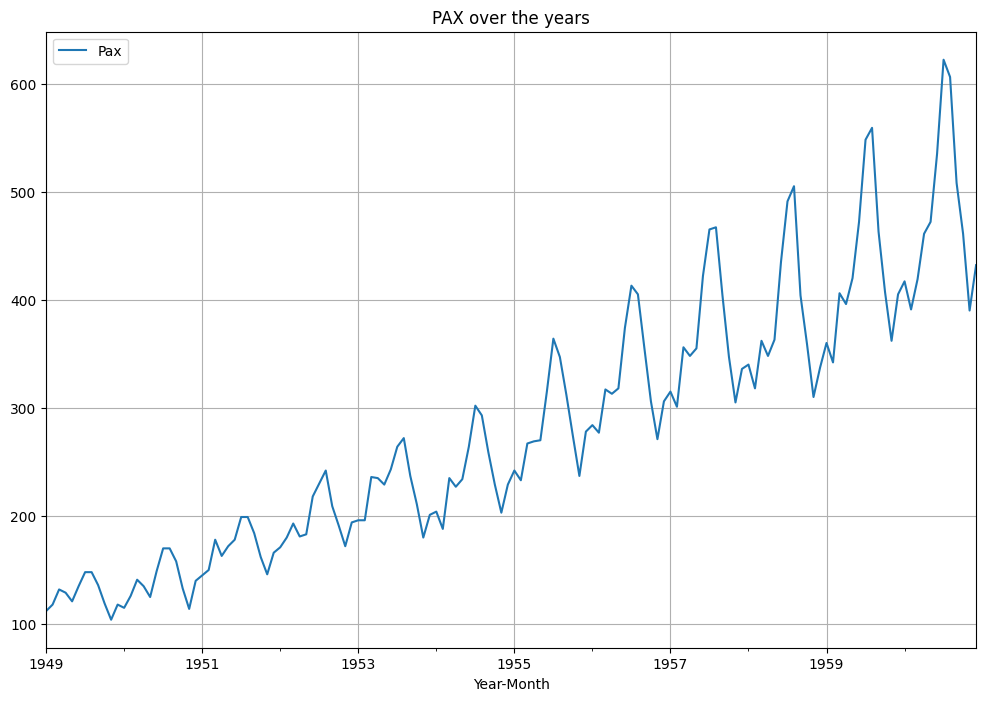

In [33]:
df_air_passengers.plot(figsize=(12,8),grid=True)
plt.title("PAX over the years")
plt.show()

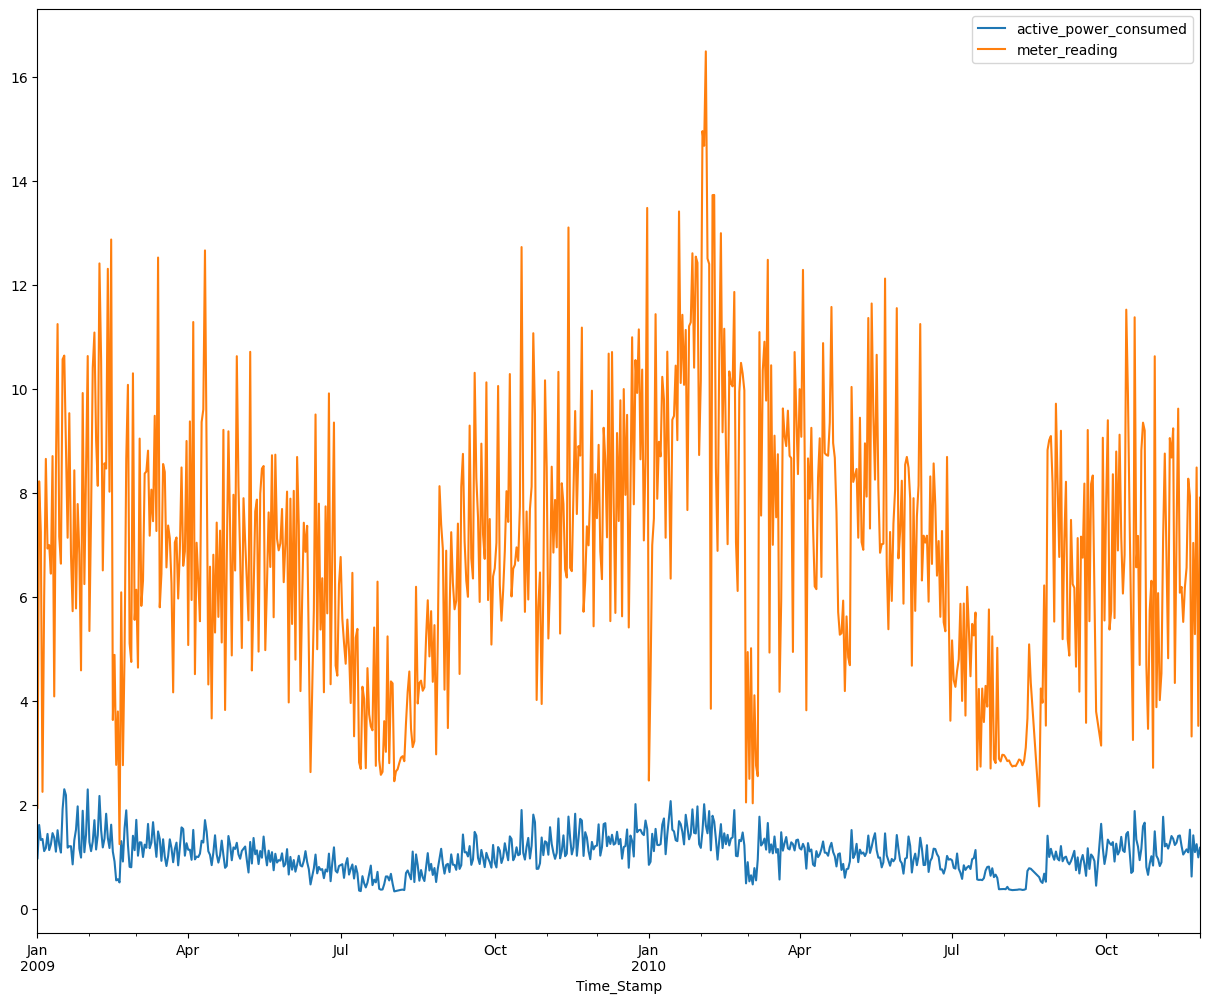

In [35]:
df_elec.plot(figsize=(15,12))
plt.show()

In [36]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
df1 = df_air_passengers
yearly_sales_across_years = pd.pivot_table(df1, values = 'Pax', columns = df1.index.year,index = df1.index.month_name())
yearly_sales_across_years = yearly_sales_across_years.reindex(index = months)

In [37]:
yearly_sales_across_years

Year-Month,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Year-Month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


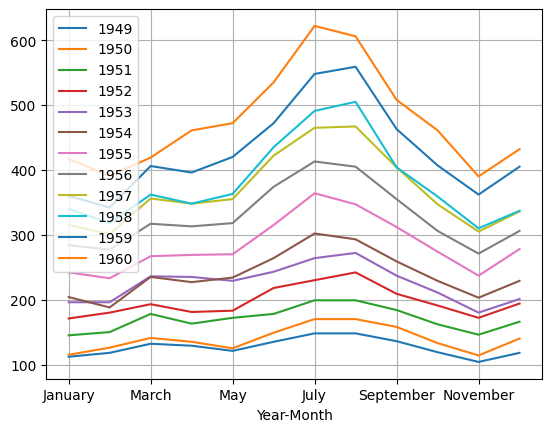

In [39]:
yearly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

In [43]:
decomposition = seasonal_decompose(df_air_passengers,model="additive")
#decomposition.plot()

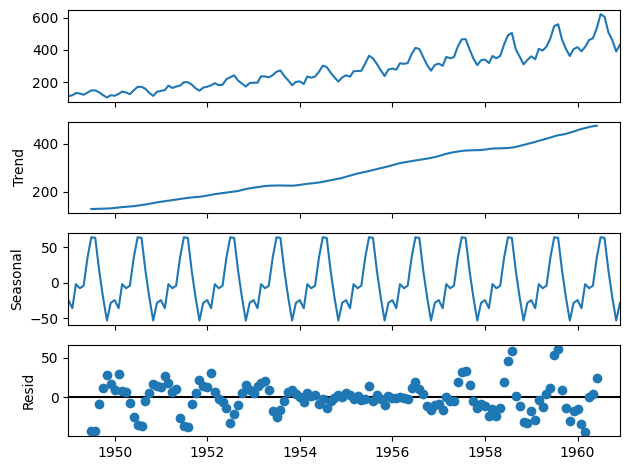

In [45]:
decomposition.plot()
plt.show()

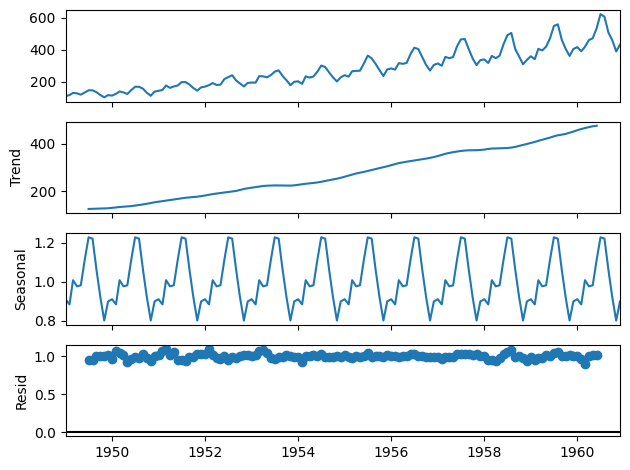

In [46]:
decomposition = seasonal_decompose(df_air_passengers,model="multiplicative")
decomposition.plot()
plt.show()

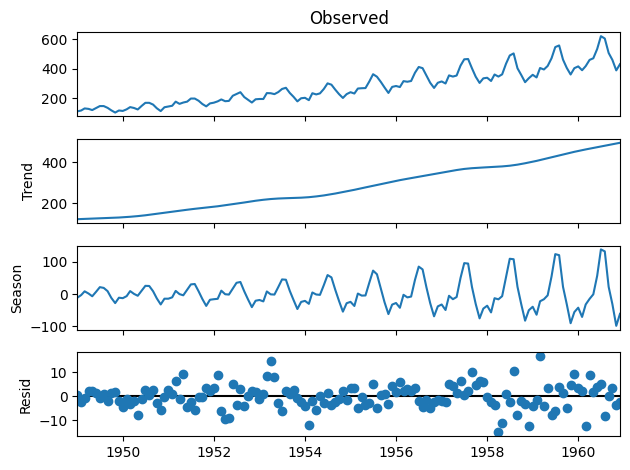

In [48]:
decomposition = STL(df_air_passengers).fit()
decomposition.plot()
plt.show()

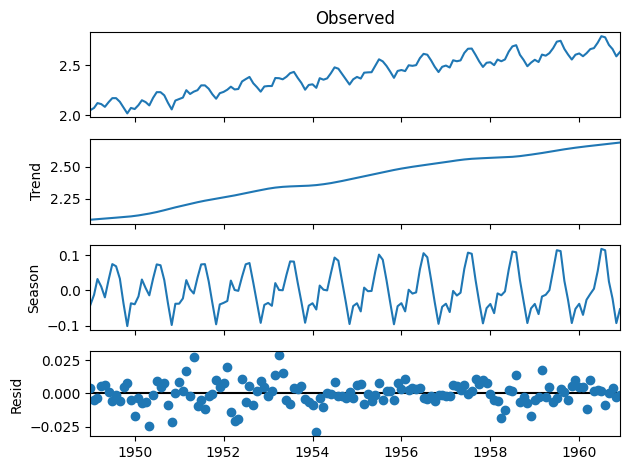

In [49]:
decomposition = STL(np.log10(df_air_passengers)).fit()
decomposition.plot()
plt.show()

In [51]:
df_stock = pd.read_csv('Stock.csv',parse_dates=['TimeStamp'],index_col='TimeStamp',dayfirst=True)
df_stock.head()

,Close
TimeStamp,
2017-05-01,64.57
2017-05-02,63.78
2017-05-03,62.20
2017-05-04,59.09
2017-05-05,61.67


In [52]:
df_stock.tail()

,Close
TimeStamp,
2019-01-02,59.41
2019-01-03,59.28
2019-01-04,59.49
2019-01-07,61.75
2019-01-08,61.40


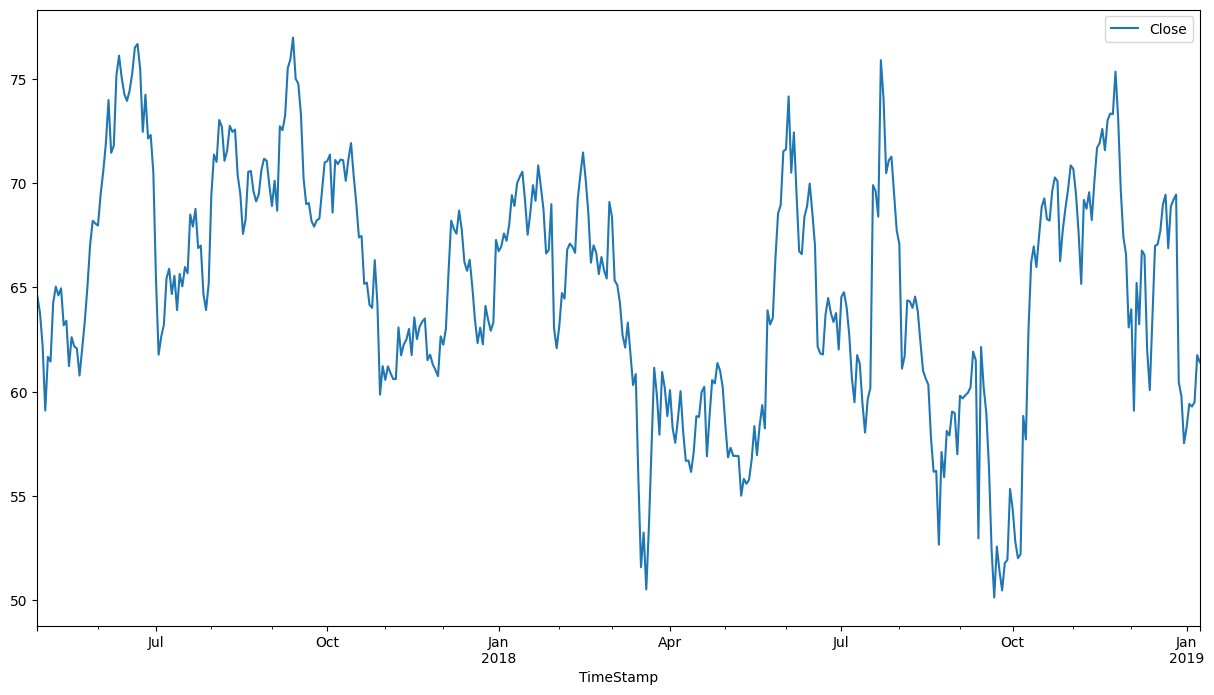

In [53]:
df_stock.plot(figsize=(15,8))
plt.show()

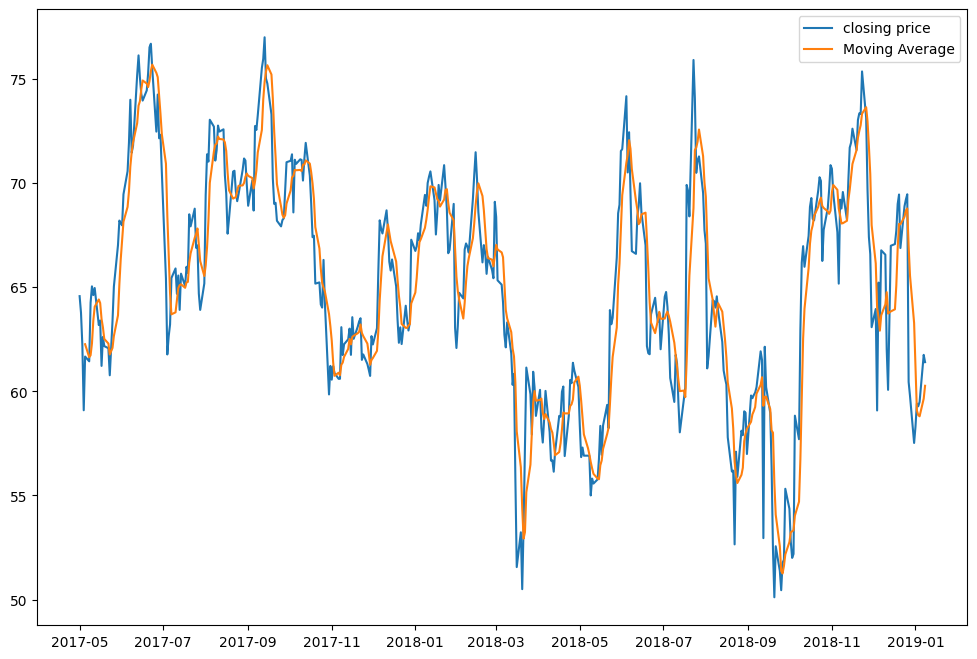

In [56]:
plt.figure(figsize=(12,8))
df5 = df_stock
plt.plot(df5, label='closing price')
plt.plot(df5.rolling(5).mean(), label='Moving Average')
plt.legend(loc='best')
plt.show()

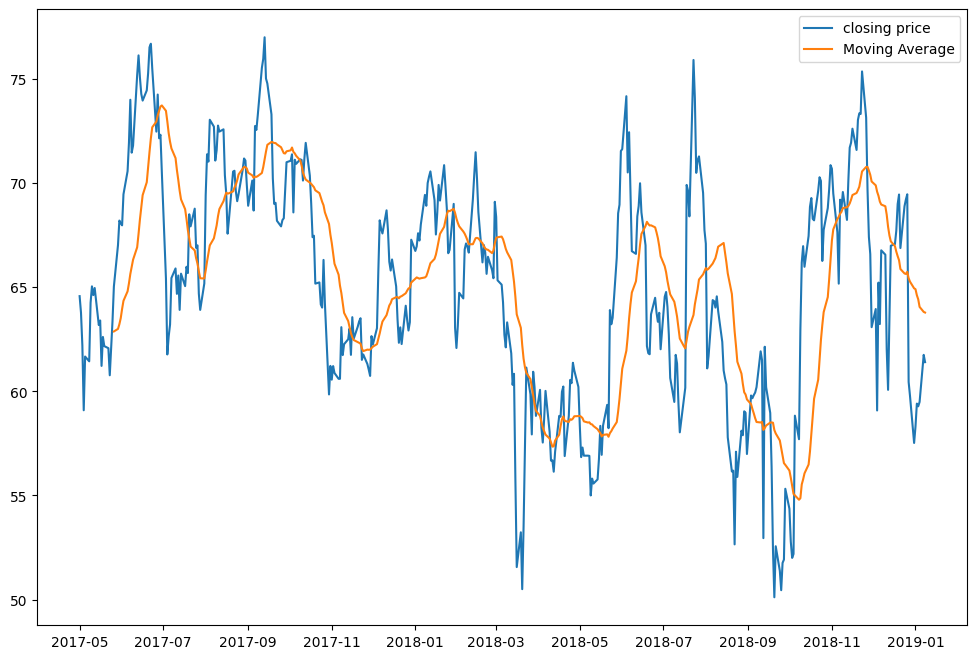

In [58]:
plt.figure(figsize=(12,8))
df5 = df_stock
plt.plot(df5, label='closing price')
plt.plot(df5.rolling(20).mean(), label='Moving Average')
plt.legend(loc='best')
plt.show()

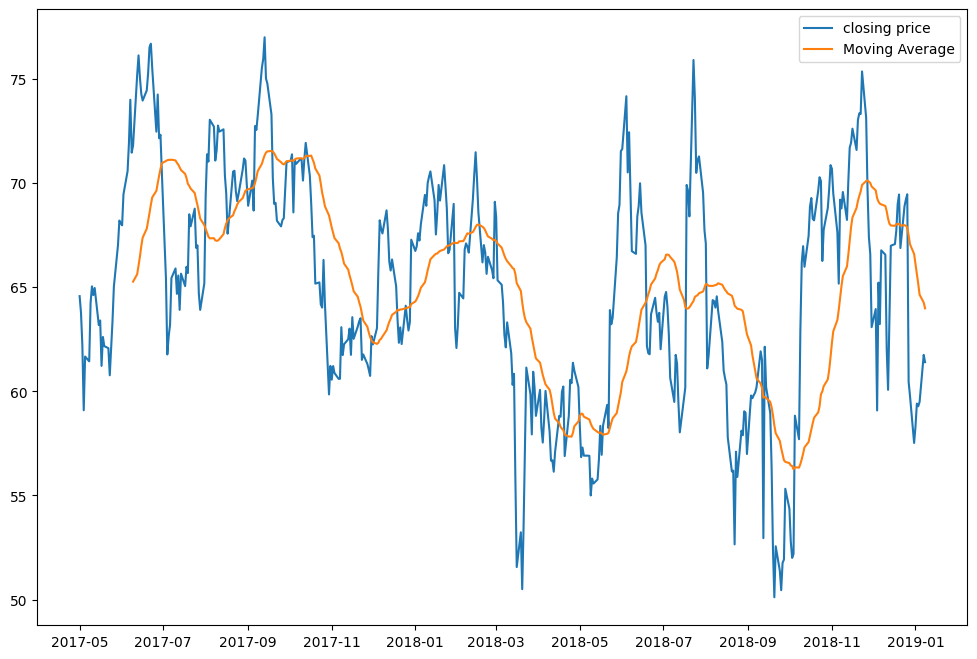

In [60]:
plt.figure(figsize=(12,8))
df5 = df_stock
plt.plot(df5, label='closing price')
plt.plot(df5.rolling(30).mean(), label='Moving Average')
plt.legend(loc='best')
plt.show()